Problem Statement: Convolutional neural network (CNN). Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [1]:
#import libraries

import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

In [3]:
# Display shape of train and test set
print("Train_X Size : ", train_x.shape)
print("Test_X Size : ", test_x.shape)
print("Train_Y Size : ", train_y.shape)  #actual train output
print("Test_Y Size : ", test_y.shape)    #actual test output

Train_X Size :  (60000, 28, 28)
Test_X Size :  (10000, 28, 28)
Train_Y Size :  (60000,)
Test_Y Size :  (10000,)


Label Description of MNIST Fashion Dataset
0 = tshirt/top
1 = trouser
2 = pullover
3 = dress
4 = coat
5 = sandal
6 = shirt
7 = sneaker
8 = bag 
9 = ankle boot

In [4]:
class_labels = ["tshirt","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]
class_labels

['tshirt',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

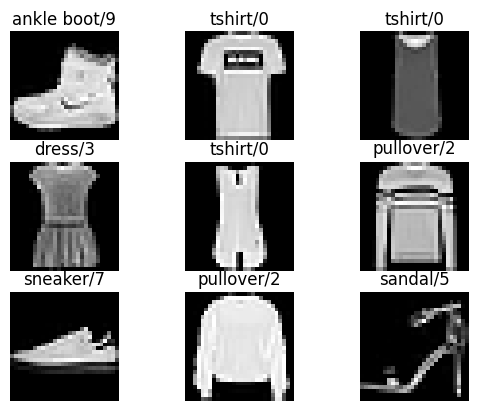

In [5]:
# Display Few images

for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i],cmap='gray')
    plt.axis('off') #off axis
    plt.title('{}/{}'.format(class_labels[train_y[i]],train_y[i]))
plt.show()
    

subplot(330+1+i)
line creates each subplot within the grid, with indices ranging from 331 to 339. The 330 indicates that there are 3 rows and 3 columns in the grid. The 1+i determines the position of the current subplot within the grid

In [6]:
# change dimension 3d to 4d 
#reshape dataset to have a single channel
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

# -1: The -1 indicates that the first dimension (number of samples) should be automatically inferred based on the other dimensions and the total number of elements.
# 28: The second dimension represents the height of the image, which is set to 28 pixels.
# 28: The third dimension represents the width of the image, which is also set to 28 pixels.
# 1: The fourth dimension represents the number of channels. Since the images are grayscale, the value is set to 1, indicating that there is only one channel.

In [7]:
# feature scaling and normalization
#convert from intgers to float #Nor . 0 to 1
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

In [8]:
# Build Model
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
# Compile model
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
# Fit the model
model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y))

Epoch 1/10
1875/1875 [==============================] - 53s 27ms/step - loss: 0.5675 - accuracy: 0.7901 - val_loss: 0.3966 - val_accuracy: 0.8596
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3681 - accuracy: 0.8658 - val_loss: 0.3517 - val_accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3241 - accuracy: 0.8821 - val_loss: 0.2995 - val_accuracy: 0.8874
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2960 - accuracy: 0.8913 - val_loss: 0.2735 - val_accuracy: 0.9012
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2784 - accuracy: 0.8973 - val_loss: 0.2769 - val_accuracy: 0.8983
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2615 - accuracy: 0.9036 - val_loss: 0.2672 - val_accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2512 - accuracy: 0.9066 - val_loss: 0.2629 -

In [10]:
# Test the Model
y_pred = model.predict(test_x)
#single value  prediction in number (category)
print(np.argmax(np.round(y_pred[0])))

313/313 [==============================] - 3s 10ms/step
9


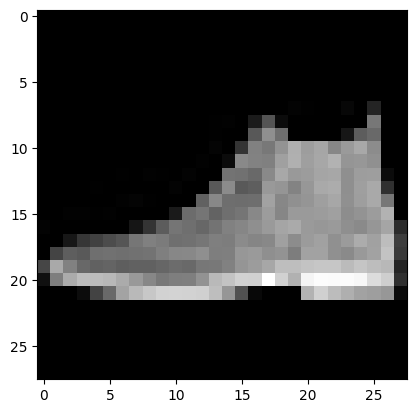

In [11]:
#single value predicition in graph (plot)
plt.imshow(test_x[0].reshape(28,28),cmap='gray')
plt.show()

In [12]:
# Evalute The Model
test_loss, test_accuracy = model.evaluate(test_x,test_y)
print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.2478 - accuracy: 0.9079
Test accuracy: 0.9078999757766724
Test loss: 0.24775159358978271


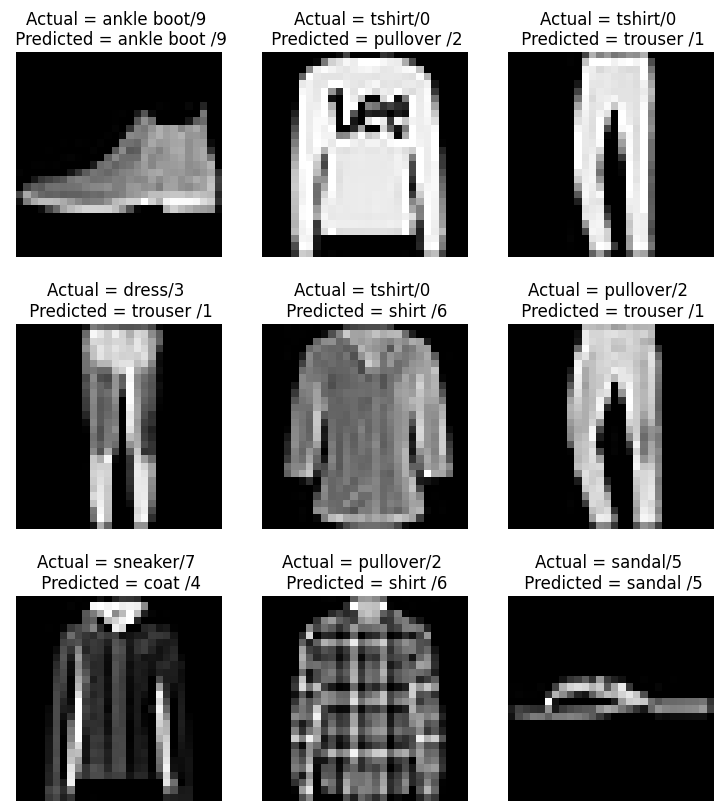

In [13]:
# Display Few images
plt.figure(figsize=(9,10))
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(test_x[i],cmap='gray')
    plt.axis('off') #off axis
    plt.title('Actual = {}/{} \n Predicted = {} /{}'.format(class_labels[train_y[i]],train_y[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
plt.show()
    